In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
adata_source_test = sc.read("adata_source_test_GW_modality_translation_conditional_densities_erythorblasts.h5ad")
adata_source_train = sc.read("adata_source_train_GW_modality_translation_conditional_densities_erythorblasts.h5ad")

adata_target_test = sc.read("adata_target_test_GW_modality_translation_conditional_densities_erythorblasts.h5ad")
adata_target_train = sc.read("adata_target_train_GW_modality_translation_conditional_densities_erythorblasts.h5ad")

In [3]:
out_arr = np.load("GW_modality_translation_conditional_densities_erythorblasts.npy")

In [4]:
outs_arr_fin = out_arr[...,-1]
mass_ps = outs_arr_fin.sum(axis=1)
normalized_ps = outs_arr_fin / mass_ps[:,None]
cond_density_integrated = normalized_ps.sum(axis=0)

In [5]:
def get_source_ery(x):
    if x["cell_type"] == "Erythroblast":
        return "Erythroblast"
    return np.nan

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


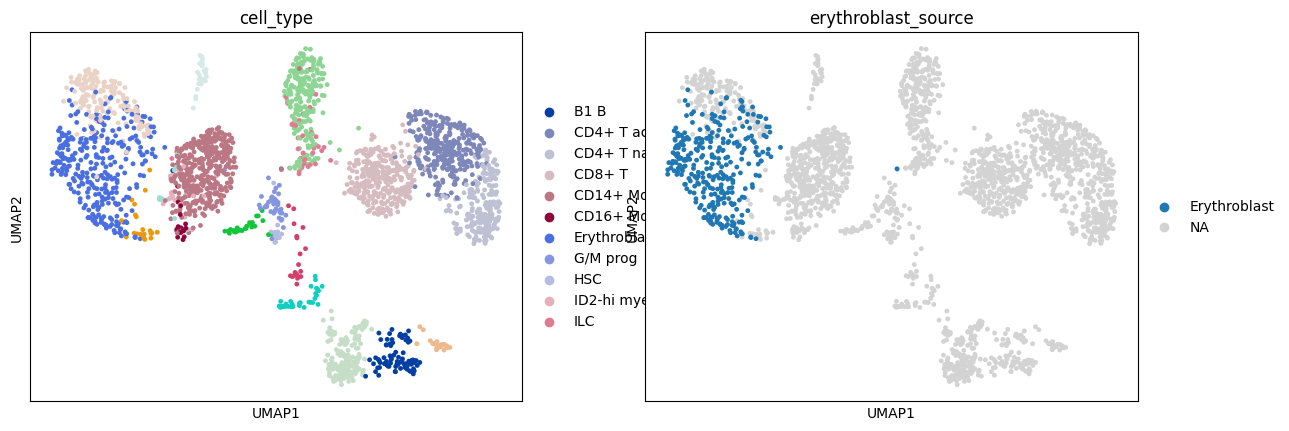

In [6]:
adata_source_test.obs["erythroblast_source"] = adata_source_test.obs.apply(get_source_ery, axis=1)
sc.pl.umap(adata_source_test, color=["cell_type", "erythroblast_source"])

In [7]:
adata_target_test.obs["cond_density"] = cond_density_integrated
sc.pl.umap(adata_target_test, color=["cell_type", "cond_density"], vmax="p98")

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


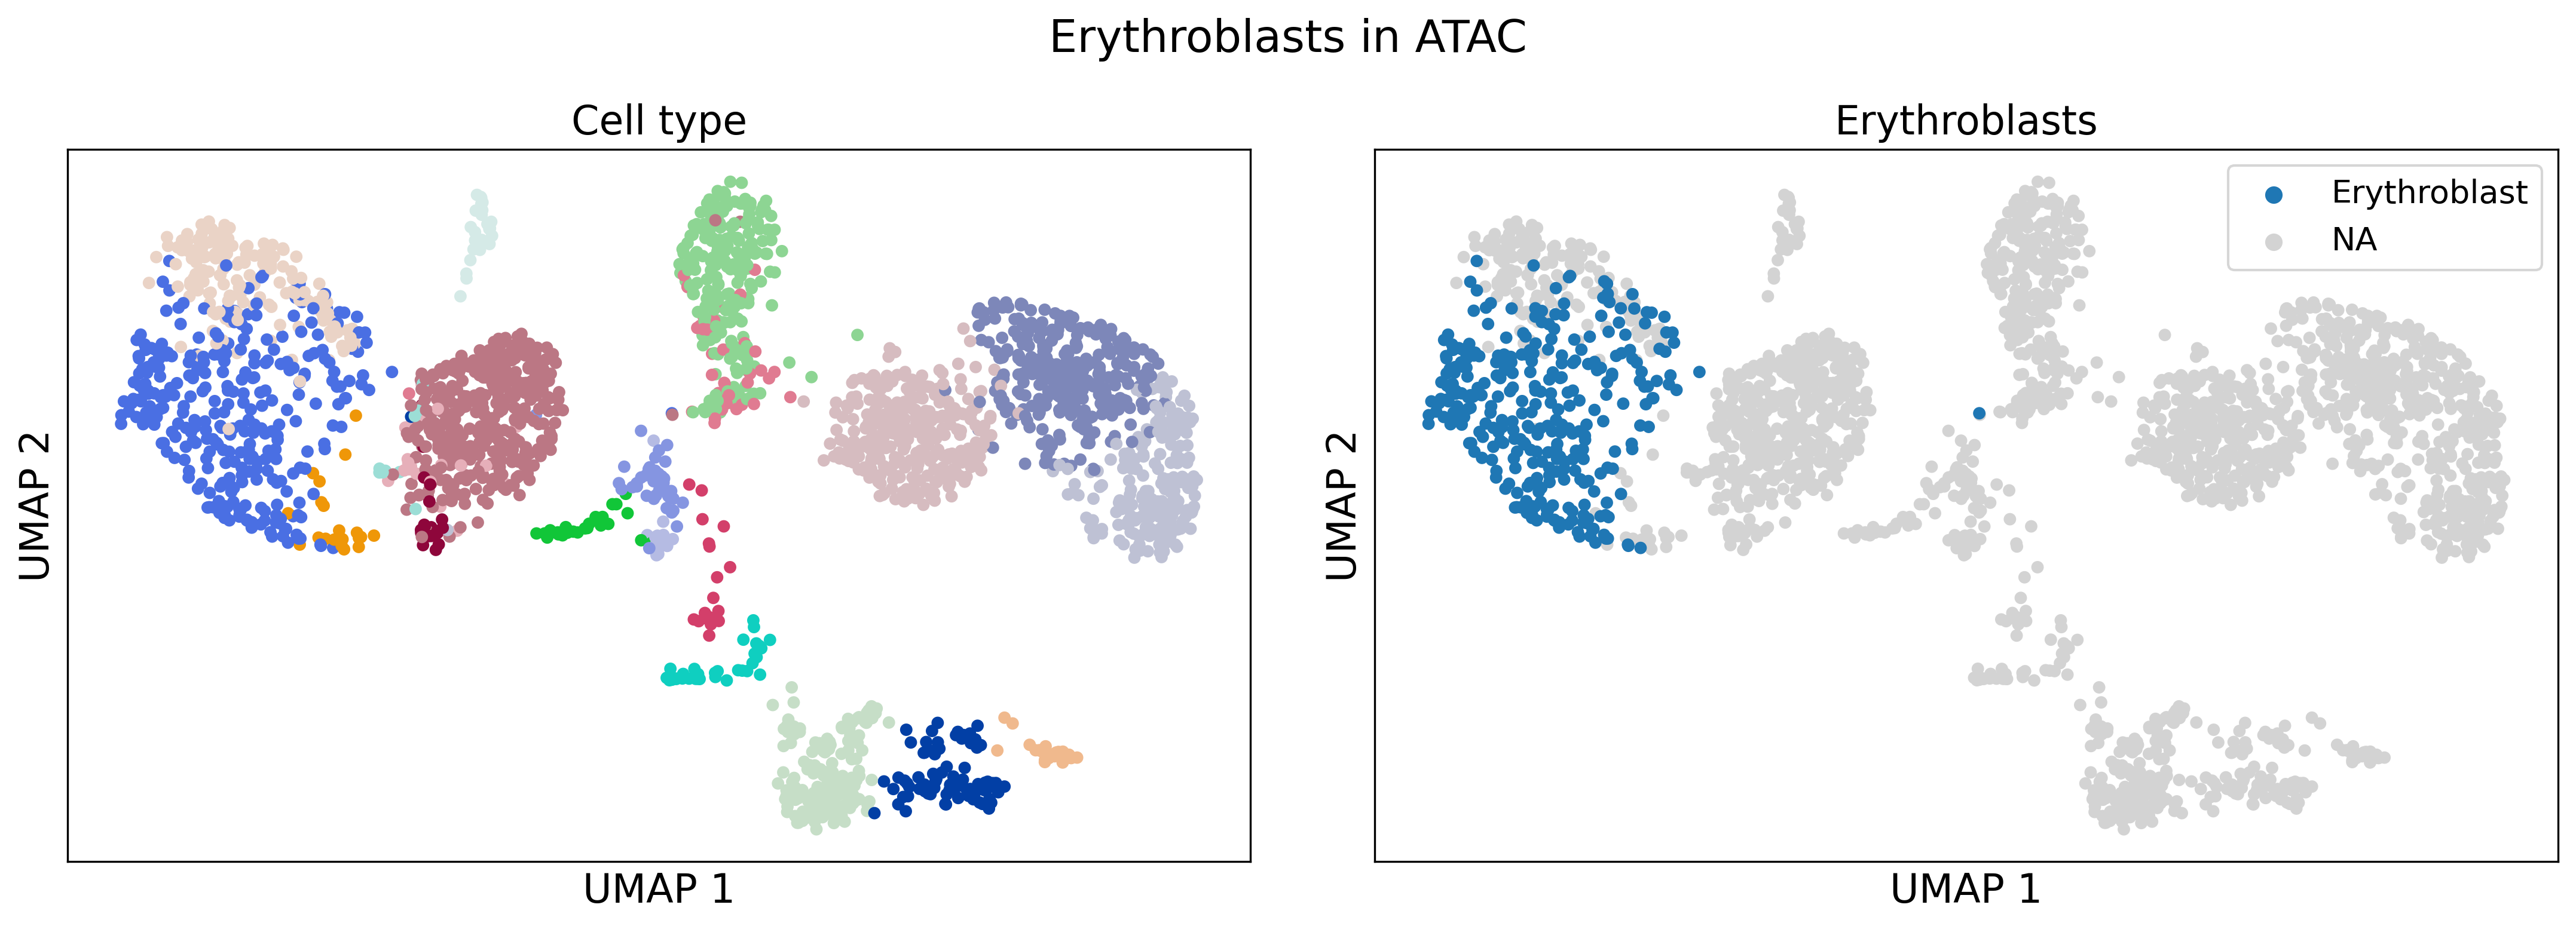

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=300)
fig.suptitle("Erythroblasts in ATAC", size=18, y=0.9)
sc.pl.umap(adata_source_test, color=["cell_type"], ax=ax1, show=False, size=100, legend_fontsize=10)
ax1.legend().set_visible(False)
ax1.set_title("Cell type", fontsize=16)
ax1.set_xlabel('UMAP 1', fontsize=16)
ax1.set_ylabel('UMAP 2', fontsize=16)
sc.pl.umap(adata_source_test, color=["erythroblast_source"], ax=ax2, show=False, size=100, legend_fontsize=10)
ax2.set_title("Erythroblasts", fontsize=16)
ax2.set_xlabel('UMAP 1', fontsize=16)
ax2.set_ylabel('UMAP 2', fontsize=16)
ax2.legend(fontsize=13)
plt.tight_layout(pad=3.0)
plt.show()

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


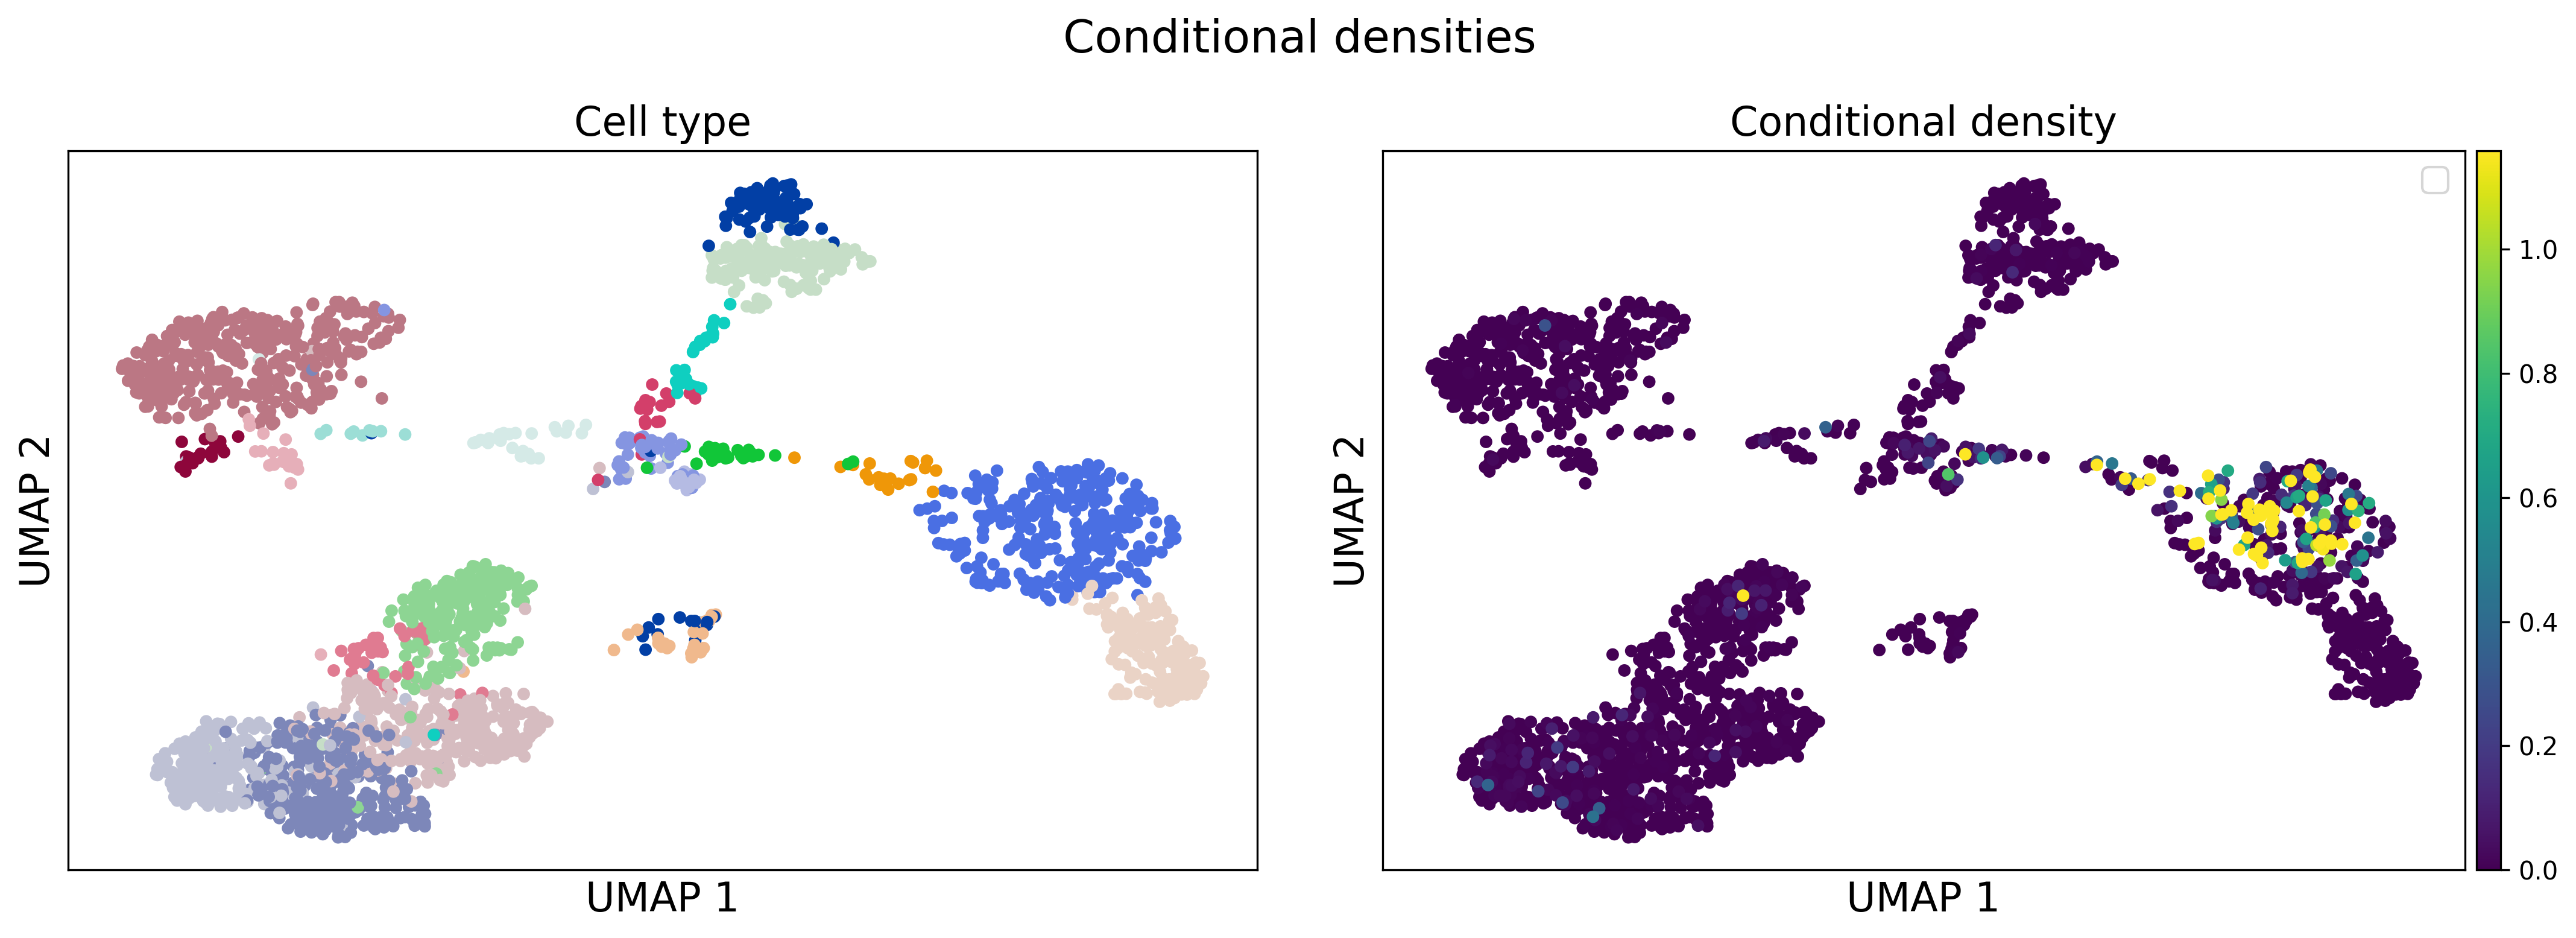

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=300)
fig.suptitle("Conditional densities", size=18, y=0.9), 
sc.pl.umap(adata_target_test, color=["cell_type"], ax=ax1, show=False, size=100, legend_fontsize=10)
ax1.legend().set_visible(False)
ax1.set_title("Cell type", fontsize=16)
ax1.set_xlabel('UMAP 1', fontsize=16)
ax1.set_ylabel('UMAP 2', fontsize=16)
sc.pl.umap(adata_target_test, color=["cond_density"], ax=ax2, show=False, size=100, legend_fontsize=10, vmax="p98")
ax2.set_title("Conditional density", fontsize=16)
ax2.set_xlabel('UMAP 1', fontsize=16)
ax2.set_ylabel('UMAP 2', fontsize=16)
ax2.legend(fontsize=13)
plt.tight_layout(pad=3.0)
plt.show()

In [10]:
adata_source_test.obs["row_number"] = np.arange(len(adata_source_test))

In [11]:
adata_source_test.obs.loc[adata_source_test[adata_source_test.obs["cell_type"]=="Erythroblast"].obs_names[0]]

ATAC_nCount_peaks               9162.0
ATAC_nucleosome_signal         0.67134
cell_type                 Erythroblast
batch                             s1d1
is_erythroblast                    1.0
erythroblast_source       Erythroblast
row_number                           6
Name: AGCGCCTAGATGGACA-1-s1d1, dtype: object

In [12]:
sc_arr = np.zeros((len(adata_source_test,)))

In [13]:
sc_arr[6] = 1.0

In [14]:
sc_arr_sizes = (sc_arr + 1.0) * 100
sc_arr_alphas = np.ones_like(sc_arr) * 0.2
sc_arr_alphas[6] = 1.0

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


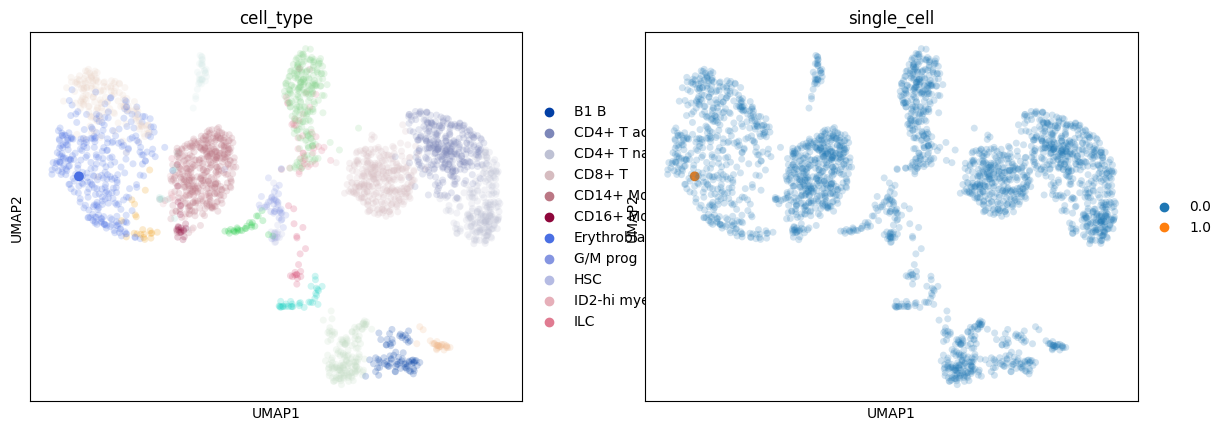

In [15]:
adata_source_test.obs["single_cell"] = sc_arr
adata_source_test.obs["single_cell"] = adata_source_test.obs["single_cell"].astype("category")
sc.pl.umap(adata_source_test, color=["cell_type", "single_cell"], size=sc_arr_sizes, alpha = sc_arr_alphas)

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


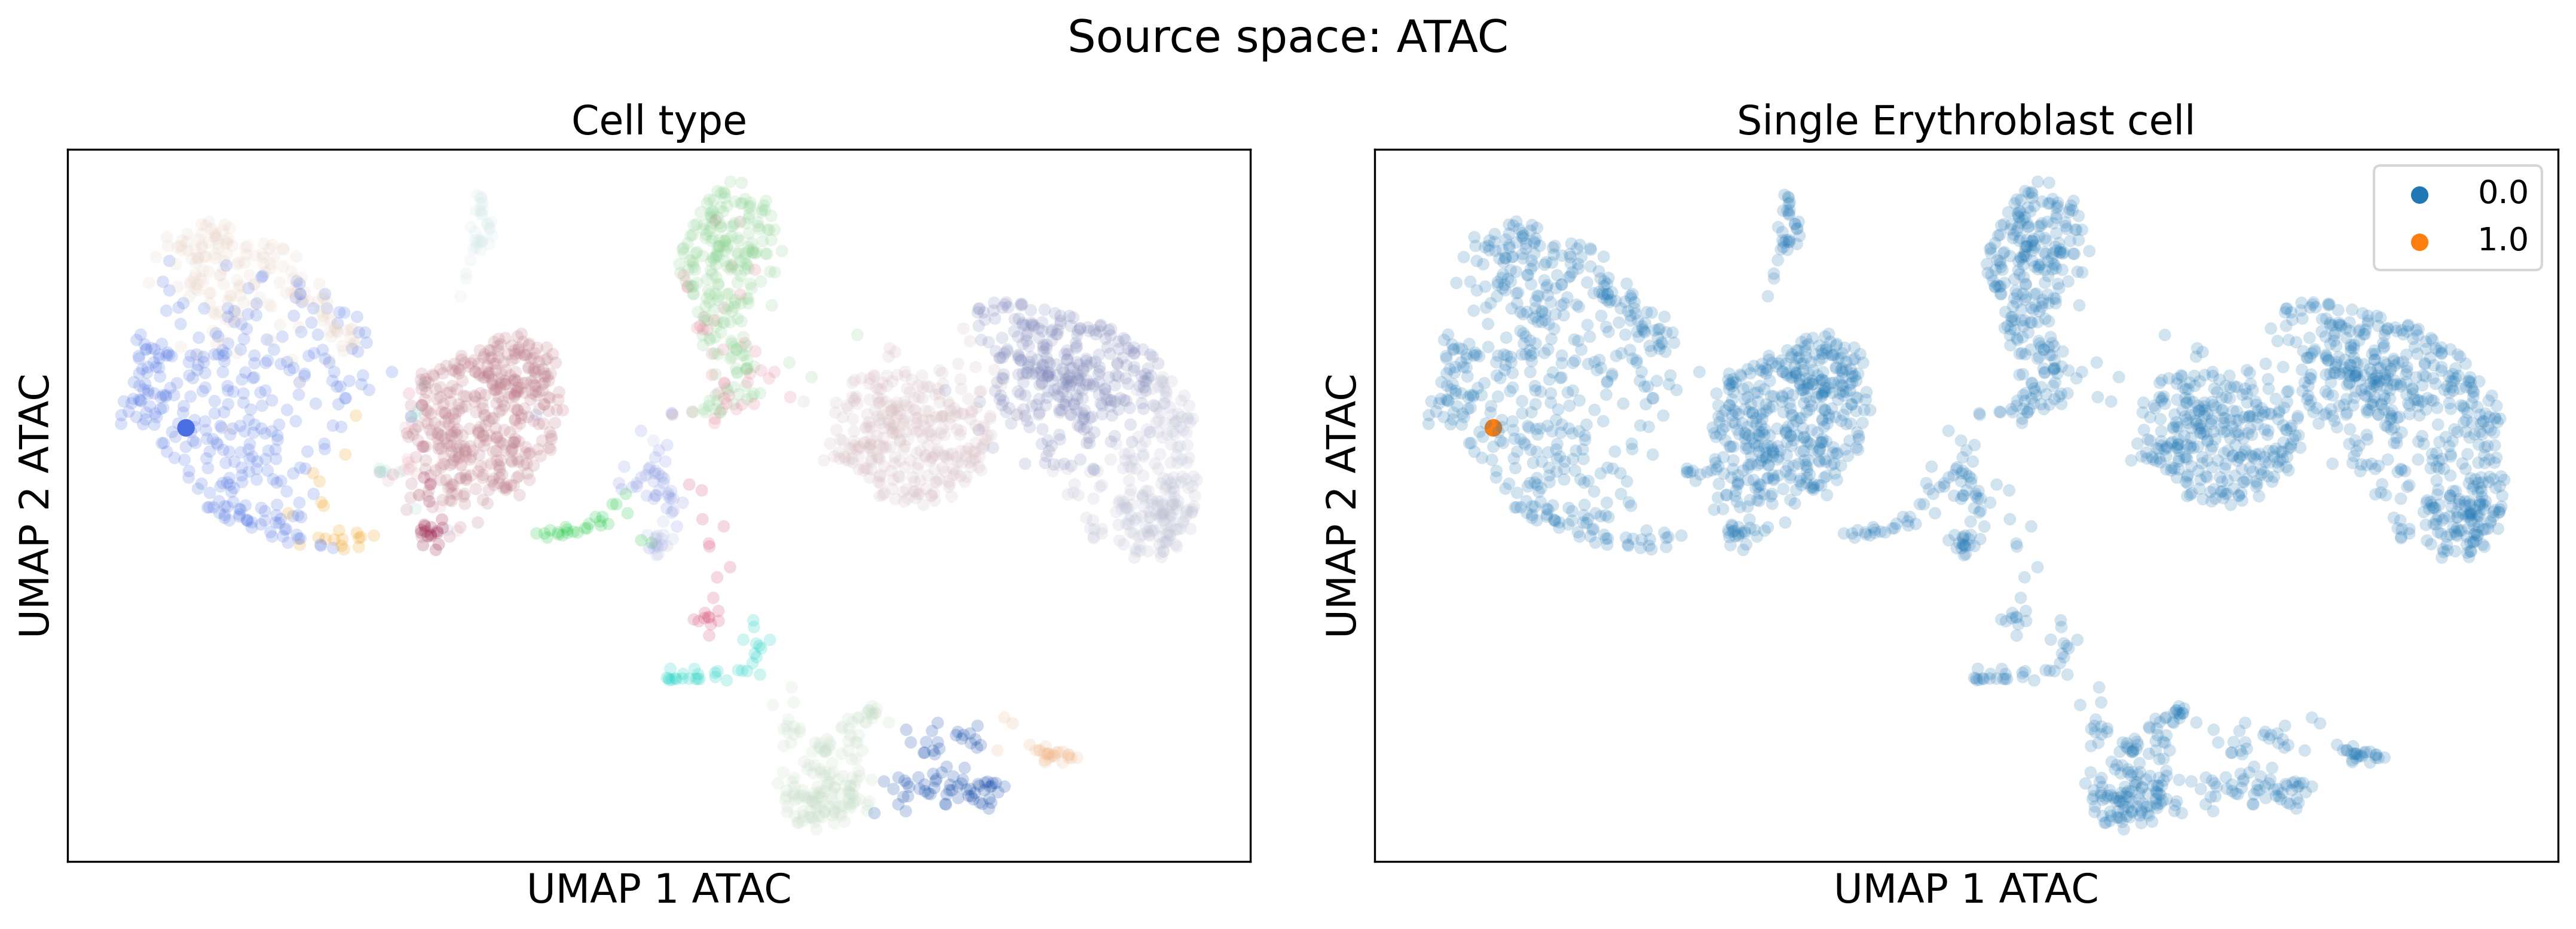

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=300)
fig.suptitle("Source space: ATAC", size=18, y=0.9)
sc.pl.umap(adata_source_test, color=["cell_type"], size=sc_arr_sizes, alpha = sc_arr_alphas, ax=ax1, show=False,  legend_fontsize=10)
ax1.legend().set_visible(False)
ax1.set_title("Cell type", fontsize=16)
ax1.set_xlabel('UMAP 1 ATAC', fontsize=16)
ax1.set_ylabel('UMAP 2 ATAC', fontsize=16)
sc.pl.umap(adata_source_test, color=["single_cell"], size=sc_arr_sizes, alpha = sc_arr_alphas, ax=ax2, show=False, legend_fontsize=10)
ax2.set_title("Single Erythroblast cell", fontsize=16)
ax2.set_xlabel('UMAP 1 ATAC', fontsize=16)
ax2.set_ylabel('UMAP 2 ATAC', fontsize=16)
ax2.legend(fontsize=13)
plt.tight_layout(pad=3.0)
plt.show()

In [23]:
adata_target_test.obs["cond_density_0"] = normalized_ps[0,:]

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


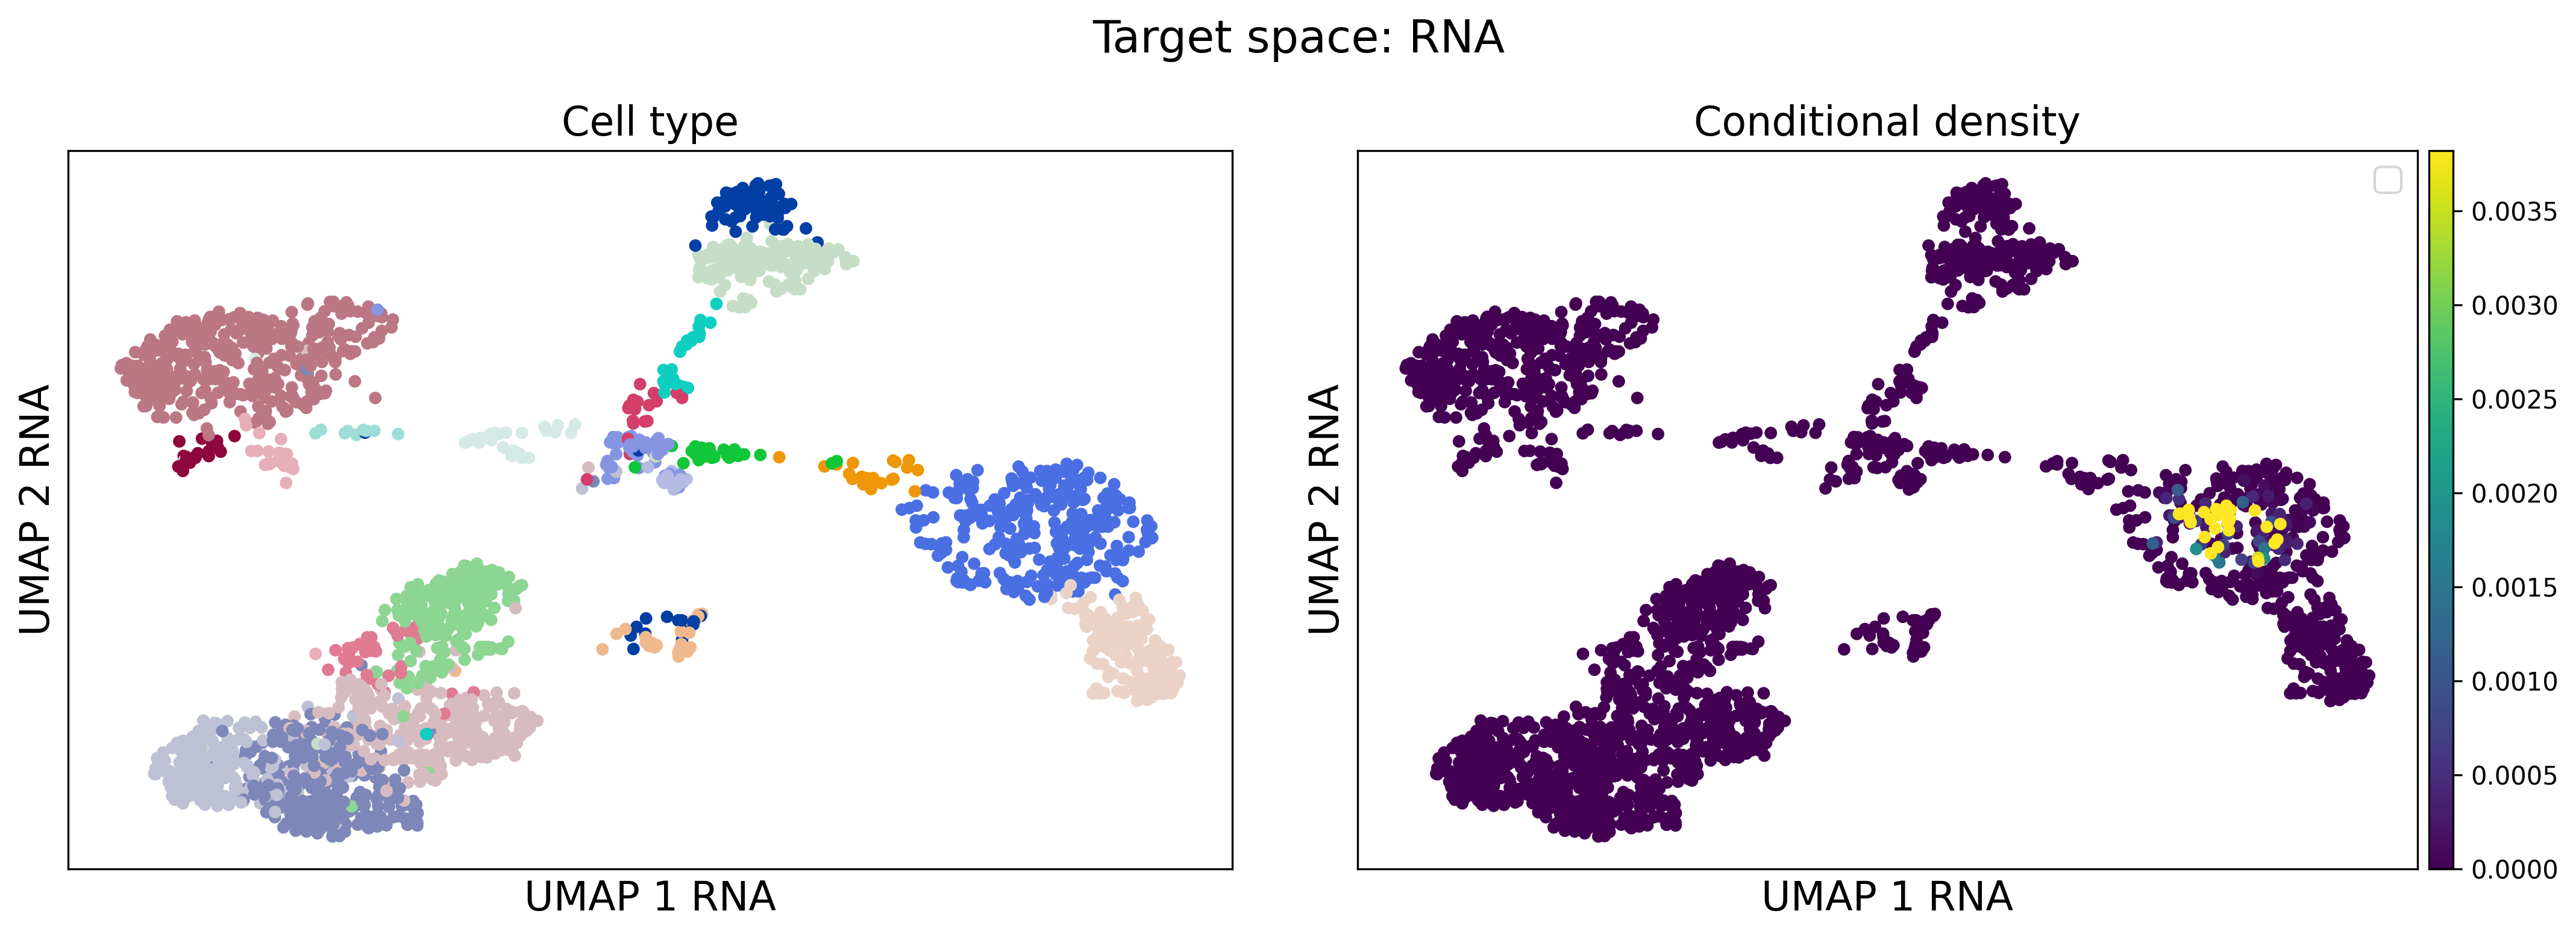

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=300)
fig.suptitle("Target space: RNA", size=18, y=0.9)
sc.pl.umap(adata_target_test, color=["cell_type"], size=100, ax=ax1, show=False,  legend_fontsize=10)
ax1.legend().set_visible(False)
ax1.set_title("Cell type", fontsize=16)
ax1.set_xlabel('UMAP 1 RNA', fontsize=16)
ax1.set_ylabel('UMAP 2 RNA', fontsize=16)
sc.pl.umap(adata_target_test, color=["cond_density_0"], size=100, ax=ax2, show=False, legend_fontsize=10, vmax="p99")
ax2.set_title("Conditional density", fontsize=16)
ax2.set_xlabel('UMAP 1 RNA', fontsize=16)
ax2.set_ylabel('UMAP 2 RNA', fontsize=16)
ax2.legend(fontsize=13)
plt.tight_layout(pad=3.0)
plt.show()